X_train shape is:  (320, 3)
X_test shape is:  (80, 3)
y_train shape is:  (320,)
y_test shape is:  (80,)


c:\Users\abhay\OneDrive\Desktop\AT\MS(R)\CNN\.conda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6376 - loss: 2016.5975
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6518 - loss: 838.8075  
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4583 - loss: 48.7410  
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3966 - loss: 0.6954 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3670 - loss: 0.6960  
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3664 - loss: 0.6956 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3448 - loss: 0.6954 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3646 - loss: 0.6945  
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3255 - loss: 0.6942 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4700 - loss: 0.6932 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6606 - loss: 0.6925 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.

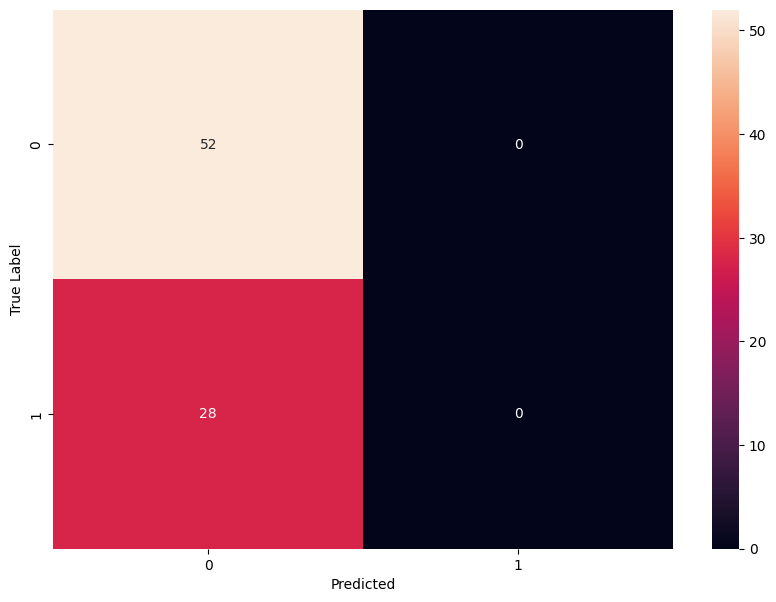

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras import models, layers
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the data
df = pd.read_csv('datasets/Sales-1.csv')
label_enc = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])
X = df.drop('Purchased', axis=1) 
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Print the shape of the train/test data
print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)
print("y_train shape is: ", y_train.shape)
print("y_test shape is: ", y_test.shape)

# Create and compile the neural network
network = models.Sequential()
network.add(layers.Dense(50, activation='relu', input_shape=(X_train.shape[1],)))  
network.add(layers.Dense(10, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification
network.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Fit the model
network.fit(X_train, y_train, epochs=300, batch_size=40)

# Predictions and evaluation
y_pred_prob = network.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype('int32')  # Convert probabilities to binary labels
test_loss, test_acc = network.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}, Test Loss: {test_loss}")

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizing the confusion matrix using Seaborn
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
X = pd.read_csv(file_name, sep=",", header=None)
print(X.head())
target = np.asarray(X[0])
data = np.asarray(X.drop(0, axis = 1))
print(data.shape, target.shape)

from keras.models import Sequential
from keras import models
from keras import layers
from keras.utils import to_categorical
# Create the network
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(13,)))
network.add(layers.Dense(4, activation='softmax'))
# Compile the network
network.compile(optimizer='rmsprop',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])


# Create training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)
# Create categorical labels
m = MinMaxScaler()
X_train = m.fit_transform(X_train)
X_test = m.transform(X_test)

train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
print("Shape of X_train: ", test_labels.shape)
print(test_labels[1])
# Fit the neural network
network.fit(X_train, train_labels, epochs=20, batch_size=40)
#Get the accuracy of test data set
print()
test_loss, test_acc = network.evaluate(X_test, test_labels)
# Print the test accuracy
print()
#y_pred = network.predict(X_test)
#ans = []
#for i in range(len(y_pred)):
  #  z = y_pred[i]
    #ans.append(z.argmax())
#y_pred = np.asarray(ans)
   
# y_pred_prob = network.predict(X_test)
# y_pred = (y_pred_prob > 0.5).astype('int32')
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)
print()
print("\nConfusion Matrix:\n\n", confusion_matrix(y_test,y_pred))


   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
(178, 13) (178,)
Shape of X_train:  (54, 4)
[0. 1. 0. 0.]


c:\Users\abhay\OneDrive\Desktop\AT\MS(R)\CNN\.conda\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4982 - loss: 1.2890
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5135 - loss: 1.0579  
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7977 - loss: 0.9235 
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9450 - loss: 0.8372 
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8814 - loss: 0.7747 
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9399 - loss: 0.7180 
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9035 - loss: 0.6807  
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9406 - loss: 0.6162 
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9506 - loss: 0.5729 
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9383 - loss: 0.5275 
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9235 - loss: 0.5095  
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9036 - loss: 0.475

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets